In [28]:
import pandas as pd 
import os
print(os.getcwd())

C:\Users\User


In [29]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Msc Computational physics\\Υπολογιστική Κβαντομηχανική\\HIGGS_8K.csv')
df

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
1,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
2,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
3,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
4,1.0,0.661761,0.486930,0.542516,2.630618,1.098063,1.021878,-2.306271,-0.652999,0.000000,...,-0.943217,0.566404,3.101961,4.883954,2.585889,0.992005,1.935075,1.144530,1.818775,2.094304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.0,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,...,0.632485,-0.704450,1.550981,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7996,0.0,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,...,-0.765825,1.250610,0.000000,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7997,1.0,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,...,1.210464,-0.117351,0.000000,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7998,0.0,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,...,-0.107062,-1.701072,0.000000,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


In [30]:
data_class= df.iloc[:,0] #Classification(1=signal,0=background)
data_21 = df.iloc[:,1:21] #Low level quantities
data_28 = df.iloc[:,22:] #High levev quantities
data_all = df.iloc[:,1:] #All data low and high

In [31]:
from sklearn.model_selection import train_test_split
data21_train, data21_test, data21_class_train, data21_class_test = train_test_split(data_21, data_class, test_size = 0.25, random_state = 42)
data28_train, data28_test, data28_class_train, data28_class_test = train_test_split(data_28, data_class, test_size = 0.25, random_state = 42)
dataAll_train, dataAll_test, dataAll_class_train, dataAll_class_test = train_test_split(data_all, data_class, test_size = 0.25, random_state = 42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 50)
classifier.fit(data21_train, data21_class_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=50)

In [33]:
data21_test_pred = classifier.predict(data21_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm21 = confusion_matrix(data21_class_test, data21_test_pred)
print(cm21)
accuracy_score(data21_class_test, data21_test_pred)

[[451 541]
 [290 718]]


0.5845

In [35]:
classifier.fit(data28_train, data28_class_train)
data28_test_pred = classifier.predict(data28_test)

In [36]:
cm28 = confusion_matrix(data28_class_test, data28_test_pred)
print(cm28)
accuracy_score(data28_class_test, data28_test_pred)

[[632 360]
 [270 738]]


0.685

In [37]:
classifier.fit(dataAll_train, dataAll_class_train)
dataAll_test_pred = classifier.predict(dataAll_test)

In [38]:
cmAll = confusion_matrix(dataAll_class_test, dataAll_test_pred)
print(cmAll)
accuracy_score(dataAll_class_test, dataAll_test_pred)

[[631 361]
 [233 775]]


0.703

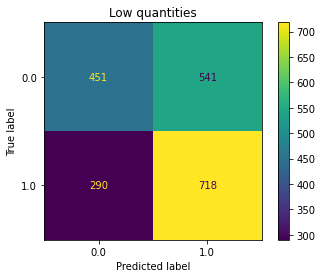

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp21 = ConfusionMatrixDisplay(confusion_matrix=cm21, display_labels=classifier.classes_)
disp21.plot()
plt.title("Low quantities")
plt.show()

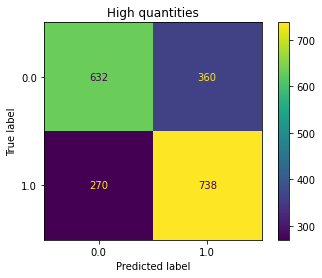

In [46]:
disp28 = ConfusionMatrixDisplay(confusion_matrix=cm28, display_labels=classifier.classes_)
disp28.plot()
plt.title("High quantities")
plt.show()

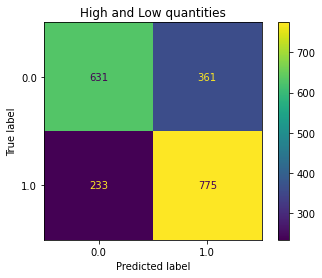

In [47]:
dispAll= ConfusionMatrixDisplay(confusion_matrix=cmAll, display_labels=classifier.classes_)
dispAll.plot()
plt.title("High and Low quantities")
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(data21_class_test, data21_test_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.45      0.52       992
         1.0       0.57      0.71      0.63      1008

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000



In [43]:
print(classification_report(data28_class_test, data21_test_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.45      0.52       992
         1.0       0.57      0.71      0.63      1008

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000



In [44]:
print(classification_report(dataAll_class_test, data21_test_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.45      0.52       992
         1.0       0.57      0.71      0.63      1008

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000

